In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, TimeDistributed, Bidirectional, LSTM, Input, UpSampling2D, RepeatVector
from tensorflow.keras.optimizers import RMSprop
import pyedflib as ped

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [4]:
def scores(y,result):
    print("Accuracy Score: "+str(accuracy_score(y, result, normalize=True, sample_weight=None)))
    print("F1 Score: "+str(f1_score(y, result, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')))
    print("Precision Score: "+str(precision_score(y, result, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')))
    print("Recall Score: "+str(recall_score(y, result, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')))
    confusion_mtx = confusion_matrix(y, result) 
    plot_confusion_matrix(confusion_mtx, classes = range(2)) 

def plot_curves(hist):
    acc = hist.history['acc']
    loss = hist.history['loss']
    val_acc = hist.history['val_acc']
    val_loss = hist.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [6]:
data_dir = 'data\\xy_arr_pre_int'
X = np.load(data_dir+'\\chb01_x.npy')
y = np.load(data_dir+'\\chb01_y.npy')
X = np.append(X,np.load(data_dir+'\\chb03_x.npy'),axis=0)
y = np.append(y,np.load(data_dir+'\\chb03_y.npy'),axis=0)
X = np.append(X,np.load(data_dir+'\\chb07_x.npy'),axis=0)
y = np.append(y,np.load(data_dir+'\\chb07_y.npy'),axis=0)
X = np.append(X,np.load(data_dir+'\\chb09_x.npy'),axis=0)
y = np.append(y,np.load(data_dir+'\\chb09_y.npy'),axis=0)
X = np.append(X,np.load(data_dir+'\\chb10_x.npy'),axis=0)
y = np.append(y,np.load(data_dir+'\\chb10_y.npy'),axis=0)

In [6]:
X = np.load(data_dir+'\\chb10_x.npy')
y = np.load(data_dir+'\\chb10_y.npy')

In [7]:
np.shape(X)

(4870, 1280, 23)

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 2),input_shape = (1280,23,1),activation='relu', padding='valid'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 2), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 2), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())

model.add(RepeatVector(1))

model.add(Bidirectional(LSTM(32,return_sequences=True)))
model.add(Bidirectional(LSTM(32,return_sequences=False)))

model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 1278, 22, 32)      224       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 639, 11, 32)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 639, 11, 32)       128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 637, 10, 32)       6176      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 318, 5, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 318, 5, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 316, 4, 32)       

In [9]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(X,y, test_size=0.25, shuffle=True)

## 1, 3, 7, 9

In [15]:
hist = model.fit(np.expand_dims(x_tr,3),y_tr,epochs=5,validation_data=(np.expand_dims(x_te,3),y_te))

Epoch 1/5
319/319 [==============================] - 11s 35ms/step - loss: 0.0199 - acc: 0.9952 - val_loss: 0.0751 - val_acc: 0.9826
Epoch 2/5
319/319 [==============================] - 11s 34ms/step - loss: 0.0186 - acc: 0.9955 - val_loss: 0.2964 - val_acc: 0.9549
Epoch 3/5
319/319 [==============================] - 11s 34ms/step - loss: 0.0156 - acc: 0.9947 - val_loss: 0.2688 - val_acc: 0.9615
Epoch 4/5
319/319 [==============================] - 11s 34ms/step - loss: 0.0191 - acc: 0.9958 - val_loss: 0.3492 - val_acc: 0.9313
Epoch 5/5
319/319 [==============================] - 11s 34ms/step - loss: 0.0177 - acc: 0.9954 - val_loss: 0.2865 - val_acc: 0.9711


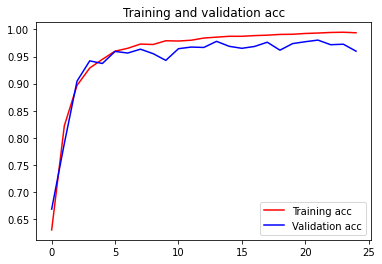

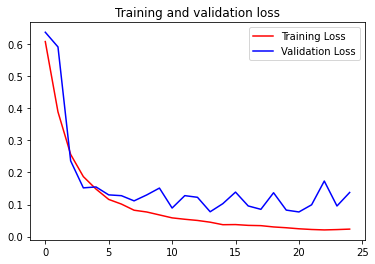

In [7]:
plot_curves(hist)

In [16]:
model.save('data\\models\\lstm_cnn_chb1,3,7,9.h5')

In [8]:
model = tf.keras.models.load_model('data\\models\\lstm_cnn_chb1,3,7,9.h5')

In [11]:
result = model.predict(np.expand_dims(X,3))
result = result>0.5

1,3,7 model

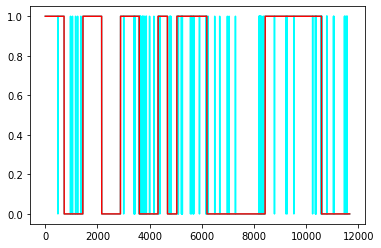

In [27]:
plt.plot(range(np.shape(y)[0]),(result[:,0]>0.5),"cyan")
plt.plot(range(np.shape(y)[0]),y,"red")
plt.show()

1,3,7,9 model

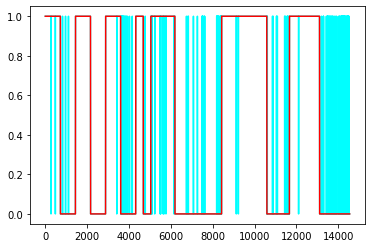

In [18]:
plt.plot(range(np.shape(y)[0]),(result[:,0]>0.5),"cyan")
plt.plot(range(np.shape(y)[0]),y,"red")
plt.show()

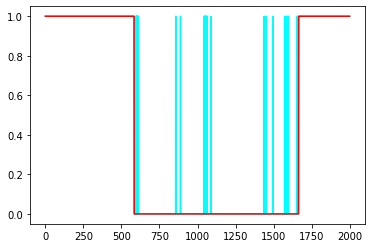

In [20]:
plt.plot(range(2000),(result[10000:12000,0]>0.5),"cyan")
plt.plot(range(2000),y[10000:12000],"red")
plt.show()

In [33]:
scores(y,result)

Accuracy Score: 0.9852860286028603
F1 Score: 0.985463931531042
Precision Score: 0.9736912751677852
Recall Score: 0.9975247524752475


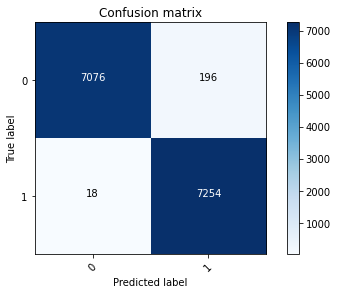

In [17]:
confusion_mtx = confusion_matrix(y, result) 
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

In [ ]:
result = model.predict(np.expand_dims(x_te,3))
result = result>0.5

In [10]:
scores(y_te,result)

Accuracy Score: 0.9835013748854262
F1 Score: 0.9835766423357664
Precision Score: 0.9702970297029703
Recall Score: 0.9972247918593895


False alarm rate = 0.026

## 1, 3, 7, 9, 10 model

In [10]:
hist = model.fit(np.expand_dims(x_tr,3),y_tr,epochs=32,validation_data=(np.expand_dims(x_te,3),y_te))

Epoch 1/40
455/455 [==============================] - 16s 35ms/step - loss: 0.6024 - acc: 0.6404 - val_loss: 0.5352 - val_acc: 0.6982
Epoch 2/40
455/455 [==============================] - 14s 32ms/step - loss: 0.4935 - acc: 0.7507 - val_loss: 0.4915 - val_acc: 0.7141
Epoch 3/40
455/455 [==============================] - 15s 32ms/step - loss: 0.3690 - acc: 0.8269 - val_loss: 0.2873 - val_acc: 0.8702
Epoch 4/40
455/455 [==============================] - 15s 32ms/step - loss: 0.2897 - acc: 0.8769 - val_loss: 0.2576 - val_acc: 0.8943
Epoch 5/40
455/455 [==============================] - 14s 32ms/step - loss: 0.2415 - acc: 0.8990 - val_loss: 0.2205 - val_acc: 0.9048
Epoch 6/40
455/455 [==============================] - 15s 32ms/step - loss: 0.2143 - acc: 0.9112 - val_loss: 0.2647 - val_acc: 0.9032
Epoch 7/40
455/455 [==============================] - 15s 32ms/step - loss: 0.1891 - acc: 0.9247 - val_loss: 0.1956 - val_acc: 0.9192
Epoch 8/40
455/455 [==============================] - 15s 32ms

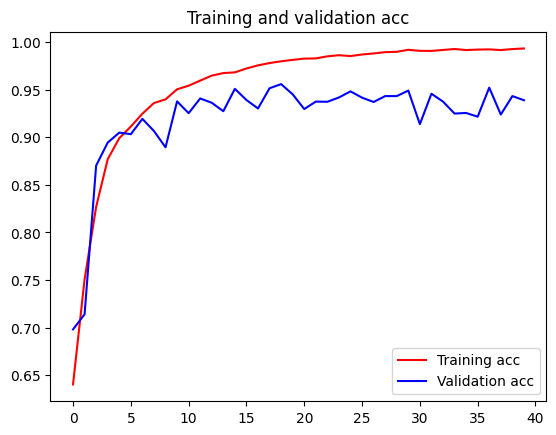

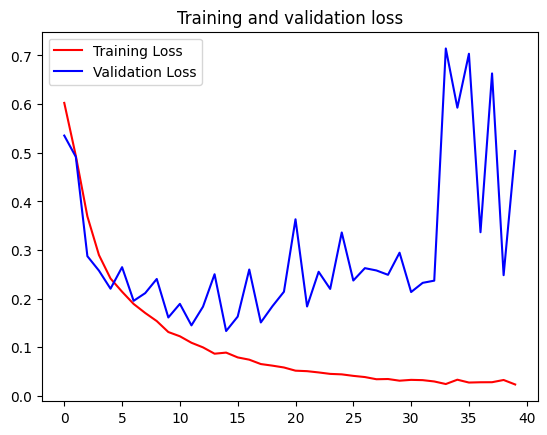

In [11]:
plot_curves(hist)

In [15]:
model.save('data\\models\\lstm_cnn_chb1,3,7,9,10.h5')

In [12]:
result = model.predict(np.expand_dims(X,3))
result = result>0.5

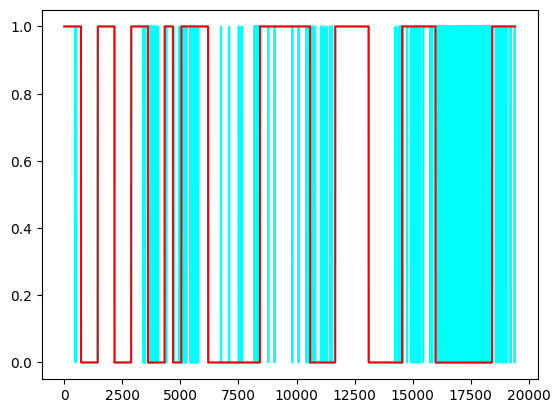

In [13]:
plt.plot(range(np.shape(y)[0]),(result[:,0]>0.5),"cyan")
plt.plot(range(np.shape(y)[0]),y,"red")
plt.show()

Accuracy Score: 0.9798598949211909
F1 Score: 0.9801108906861996
Precision Score: 0.9680466237942122
Recall Score: 0.9924796538580406


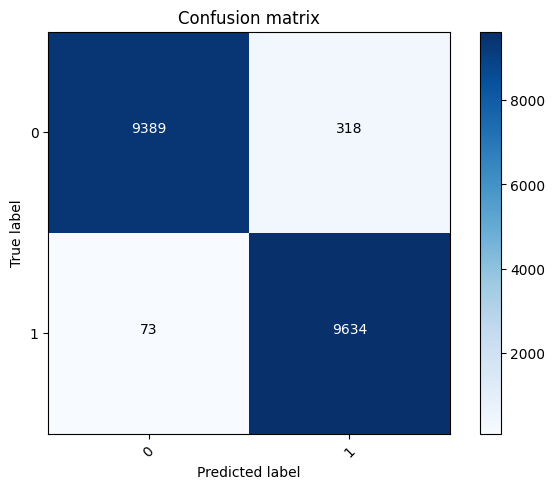

In [14]:
scores(y,result)

False Alarm rate: 0.03069

Accuracy Score: 0.49691991786447637
F1 Score: 0.6628131021194604
Precision Score: 0.4984475263920513
Recall Score: 0.988911704312115


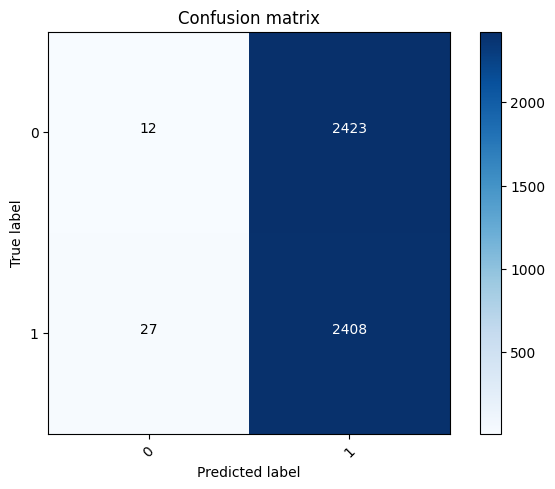

In [12]:
scores(y,result)